<a href="https://colab.research.google.com/github/DataWhizAnushka/ds_assignments/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SUPPORT VECTOR MANCHINE**

Exploratory data analysis

In [ ]:
import pandas as pd
mushrooms = pd.read_csv('mushroom.csv')
mushrooms.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

2. Utilize Histograms, Box Plots, or Density Plots to Understand Feature Distributions

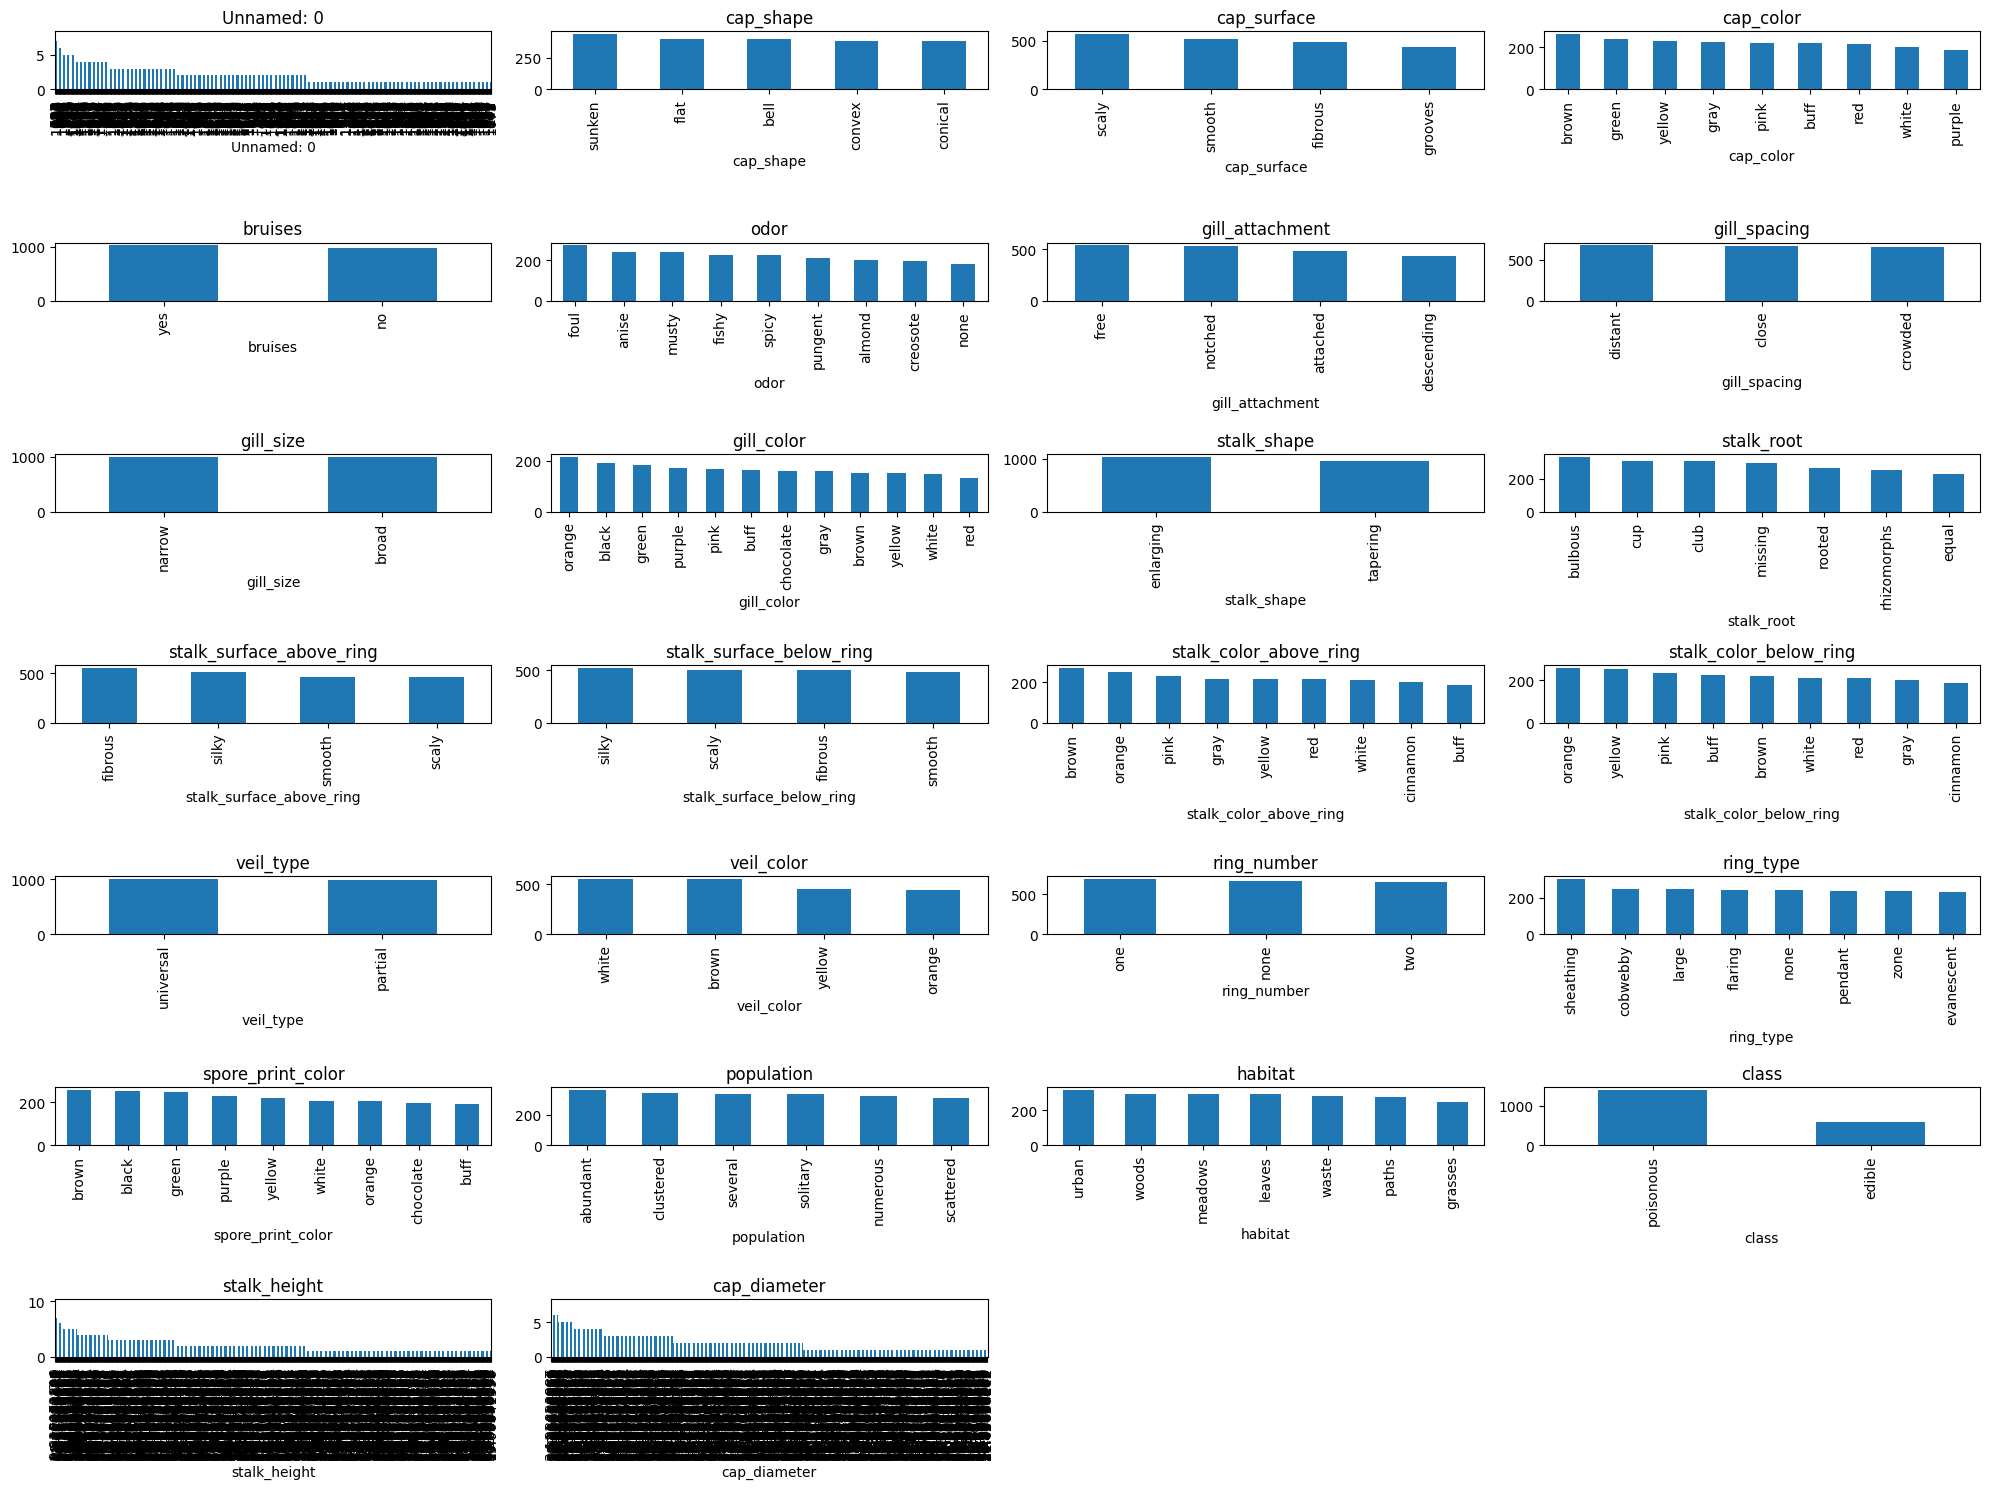

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of rows needed for subplots
num_columns = len(mushrooms.columns)
num_rows = (num_columns + 3) // 4  # Round up to ensure enough rows

# Plot histograms for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(mushrooms.columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust number of rows dynamically
    mushrooms[column].value_counts().plot(kind='bar')
    plt.title(column)
plt.tight_layout()
plt.show()

3. Investigate Feature Correlations to Discern Relationships Within the Data

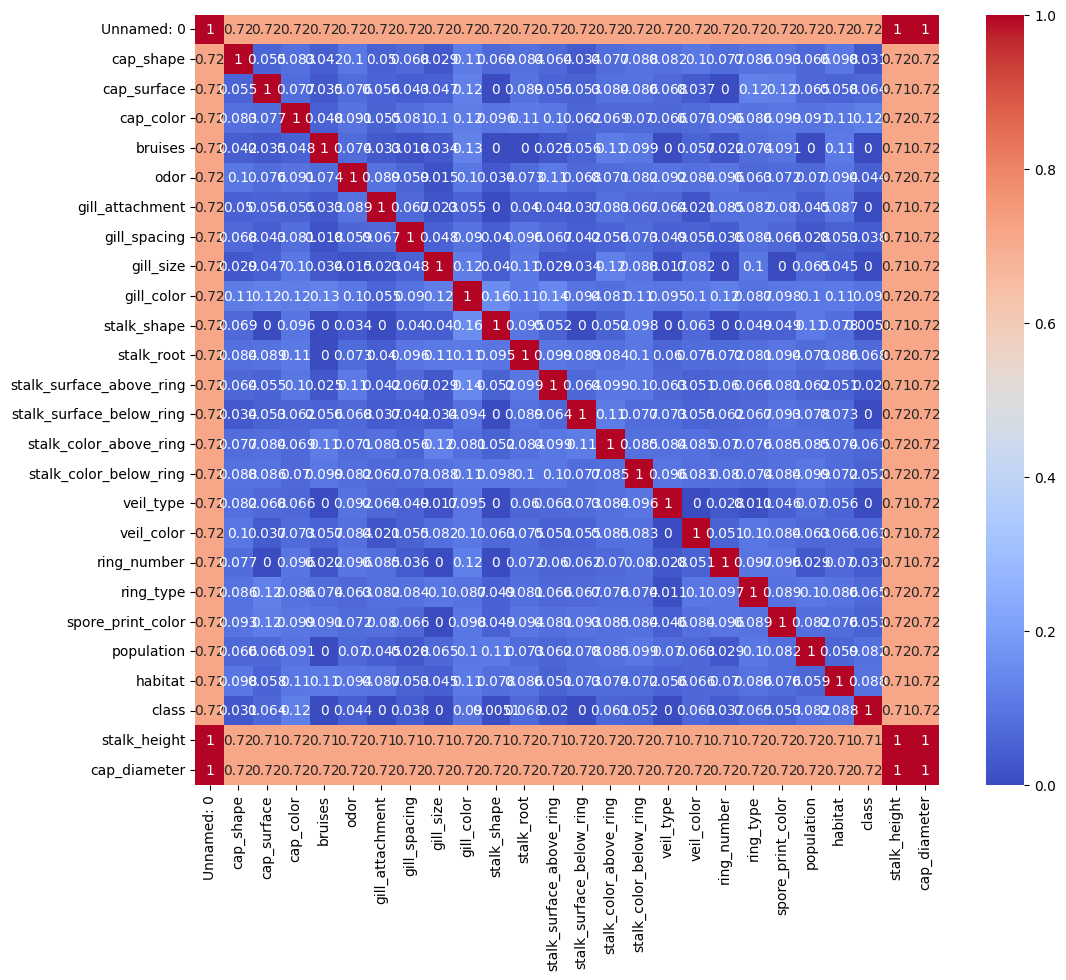

In [ ]:
import numpy as np
import scipy.stats as ss

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    # Ensure n is a numeric value by summing only numeric columns
    n = confusion_matrix.select_dtypes(include=np.number).sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create a correlation matrix using Cramer's V
correlation_matrix = pd.DataFrame(index=mushrooms.columns, columns=mushrooms.columns)

for col1 in mushrooms.columns:
    for col2 in mushrooms.columns:
        confusion_matrix = pd.crosstab(mushrooms[col1], mushrooms[col2])
        correlation_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

# Convert to numeric and plot the heatmap
correlation_matrix = correlation_matrix.astype(float)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Data Preprocessing

1. Encode Categorical Variables if Necessary

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target variable
X = mushrooms.drop('class', axis=1)
y = mushrooms['class']

# One-hot encode the categorical features
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

print(X_encoded.shape)


(2000, 3049)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2. Split the Dataset into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)


(1400, 3049) (600, 3049)


Data Visualization

1. Employ Scatter Plots, Pair Plots, or Relevant Visualizations

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)



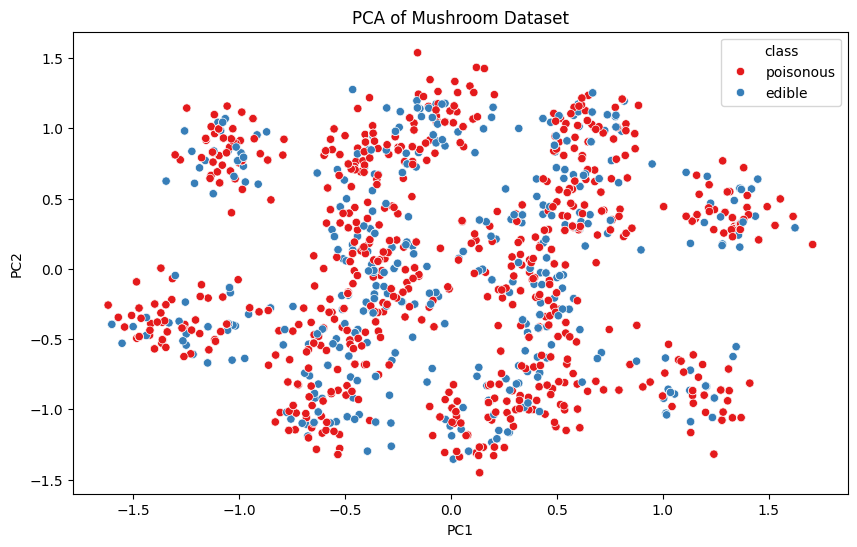

In [ ]:
# Scatter plot of the PCA-reduced features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', palette='Set1')
plt.title('PCA of Mushroom Dataset')
plt.show()


2. Visualize Class Distributions to Gauge Dataset Balance or Imbalance

<ipython-input-14-9c4f9ba20be4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mushrooms, x='class', palette='Set1')


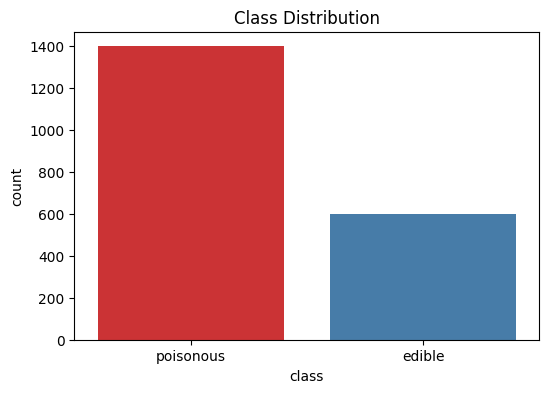

In [ ]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=mushrooms, x='class', palette='Set1')
plt.title('Class Distribution')
plt.show()


 SVM Implementation

1. Implement a Basic SVM Classifier Using Python Libraries Like scikit-learn


In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM model
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

2. Evaluate Model Performance on the Testing Data Using Appropriate Metrics

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8516666666666667
Classification Report:
              precision    recall  f1-score   support

      edible       0.88      0.59      0.70       180
   poisonous       0.85      0.96      0.90       420

    accuracy                           0.85       600
   macro avg       0.86      0.78      0.80       600
weighted avg       0.85      0.85      0.84       600

Confusion Matrix:
[[106  74]
 [ 15 405]]


 Visualization of SVM Results

1. Visualize Classification Results on the Testing Data

<ipython-input-17-c1aac528177a>:18: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, style=y_pred_pca, palette='Set1', markers=['o', 's'])


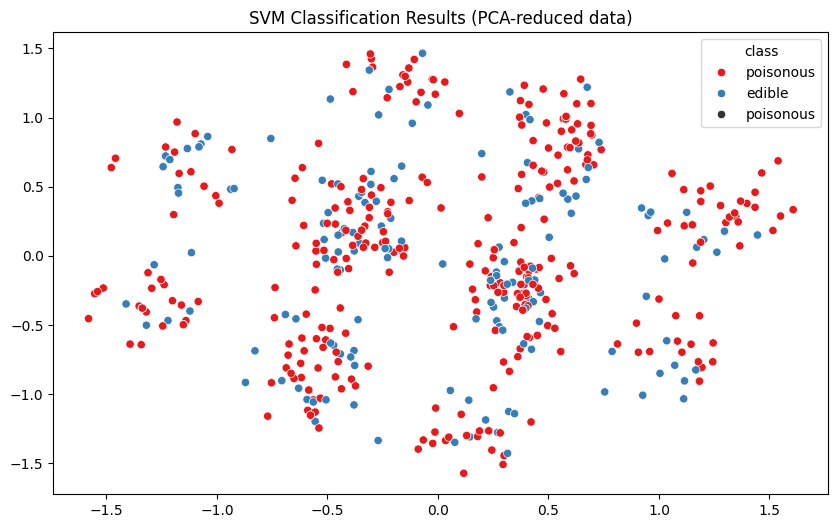

In [ ]:
# This part is tricky with high-dimensional data. I'll use PCA-reduced data for visualization.
# Scatter plot of the PCA-reduced test set with SVM decision boundary

# Fit PCA on training data
pca_svm = PCA(n_components=2)
X_train_pca = pca_svm.fit_transform(X_train)
X_test_pca = pca_svm.transform(X_test)

# Train SVM on PCA-reduced data
svm_classifier_pca = SVC(kernel='linear')
svm_classifier_pca.fit(X_train_pca, y_train)

# Predict on the PCA-reduced test set
y_pred_pca = svm_classifier_pca.predict(X_test_pca)

# Plot decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, style=y_pred_pca, palette='Set1', markers=['o', 's'])
plt.title('SVM Classification Results (PCA-reduced data)')
plt.show()


: Parameter Tuning and Optimization

1. Experiment with Different SVM Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVM with the best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


SVC(C=1, kernel='poly')

Comparison and Analysis

1. Compare SVM Performance with Various Kernels

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
performances = {}

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performances[kernel] = accuracy

print(f"SVM Performance with Different Kernels: {performances}")


SVM Performance with Different Kernels: {'linear': 0.8516666666666667, 'poly': 0.855, 'rbf': 0.7966666666666666, 'sigmoid': 0.7}


2. Analyze SVM Strengths and Weaknesses for the Mushroom Dataset.

Strengths:

- High Accuracy: SVMs can achieve high classification accuracy due to their ability to find the optimal separating hyperplane.
- Effective with High-Dimensional Data: SVMs perform well even when the number of features is large relative to the number of samples, which is beneficial for the one-hot encoded Mushroom dataset.

Weaknesses:

- Computational Complexity: Training SVMs can be time-consuming, especially with large datasets and complex kernels.
- Sensitivity to Parameter Tuning: SVM performance can vary significantly based on the choice of kernel and hyperparameters, requiring extensive tuning.

3. Practical Implications of SVM in Real-World Classification Tasks.

Applications:

- Text and Image Classification: SVMs are widely used in applications where the data is high-dimensional, such as text categorization and image recognition.
- Medical Diagnosis: Effective in scenarios where precision is crucial, such as cancer detection.

Considerations:

- Scalability: SVMs may not be the best choice for very large datasets due to computational demands.
- Parameter Sensitivity: Requires careful tuning of hyperparameters (C, kernel, gamma) for optimal performance, which can be resource-intensive.
- Interpretability: SVMs are less interpretable compared to simpler models like decision trees, making them less transparent in critical decision-making applications.